https://n8n.io/workflows/

# Run n8n locally

```bash
docker volume create n8n_data
docker run -it --rm --name n8n -p 5678:5678 -v n8n_data:/home/node/.n8n docker.n8n.io/n8nio/n8n
```

Access the editor at `http://localhost:5678`

# Try any of these and share screenshots:
* [Your First AI Agent](https://drive.google.com/file/d/1Rbq3xqiqBqL4IL3EL0O0r74Vpxsz_UXN/view?usp=sharing)
* [AI Newsletter Automation v0.1](https://drive.google.com/file/d/1SkEWZctqRWIkS78VA3VCLLZhhjEYygai/view?usp=sharing)
* [AI Newsletter Automation v1.0](https://drive.google.com/file/d/1Gv7TCKkDOkLe1rutI2kYTO2rQi0S5q3S/view?usp=sharing)

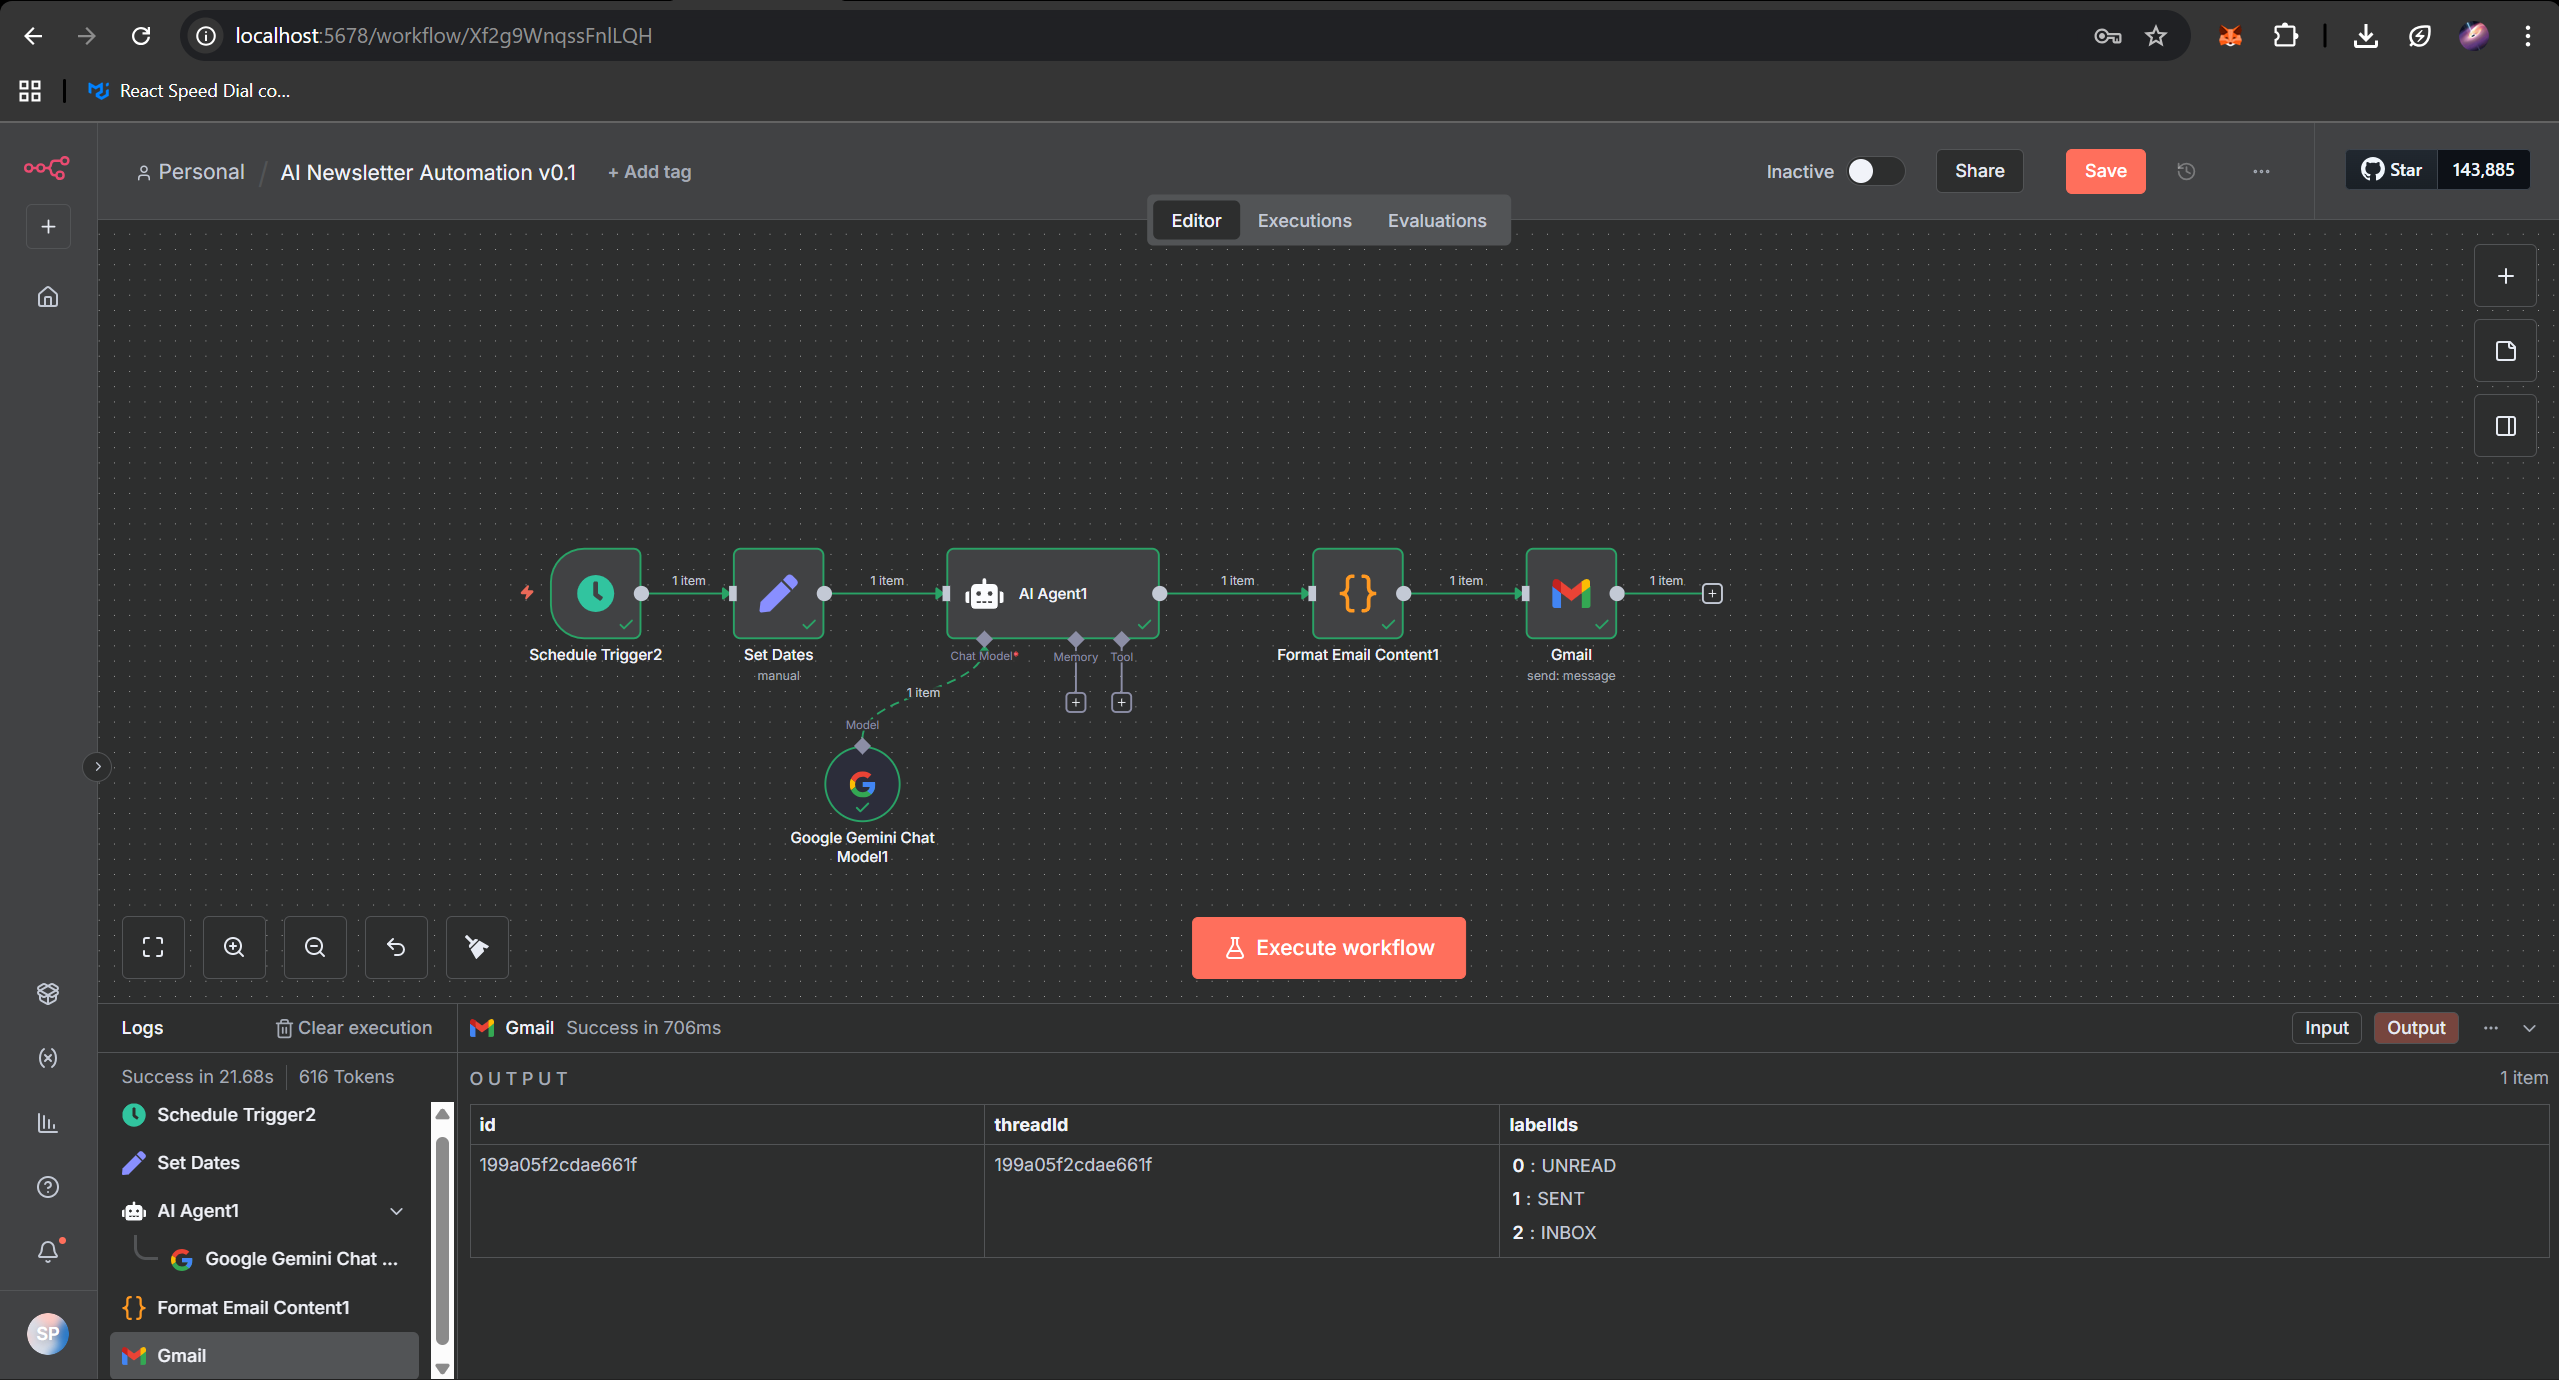

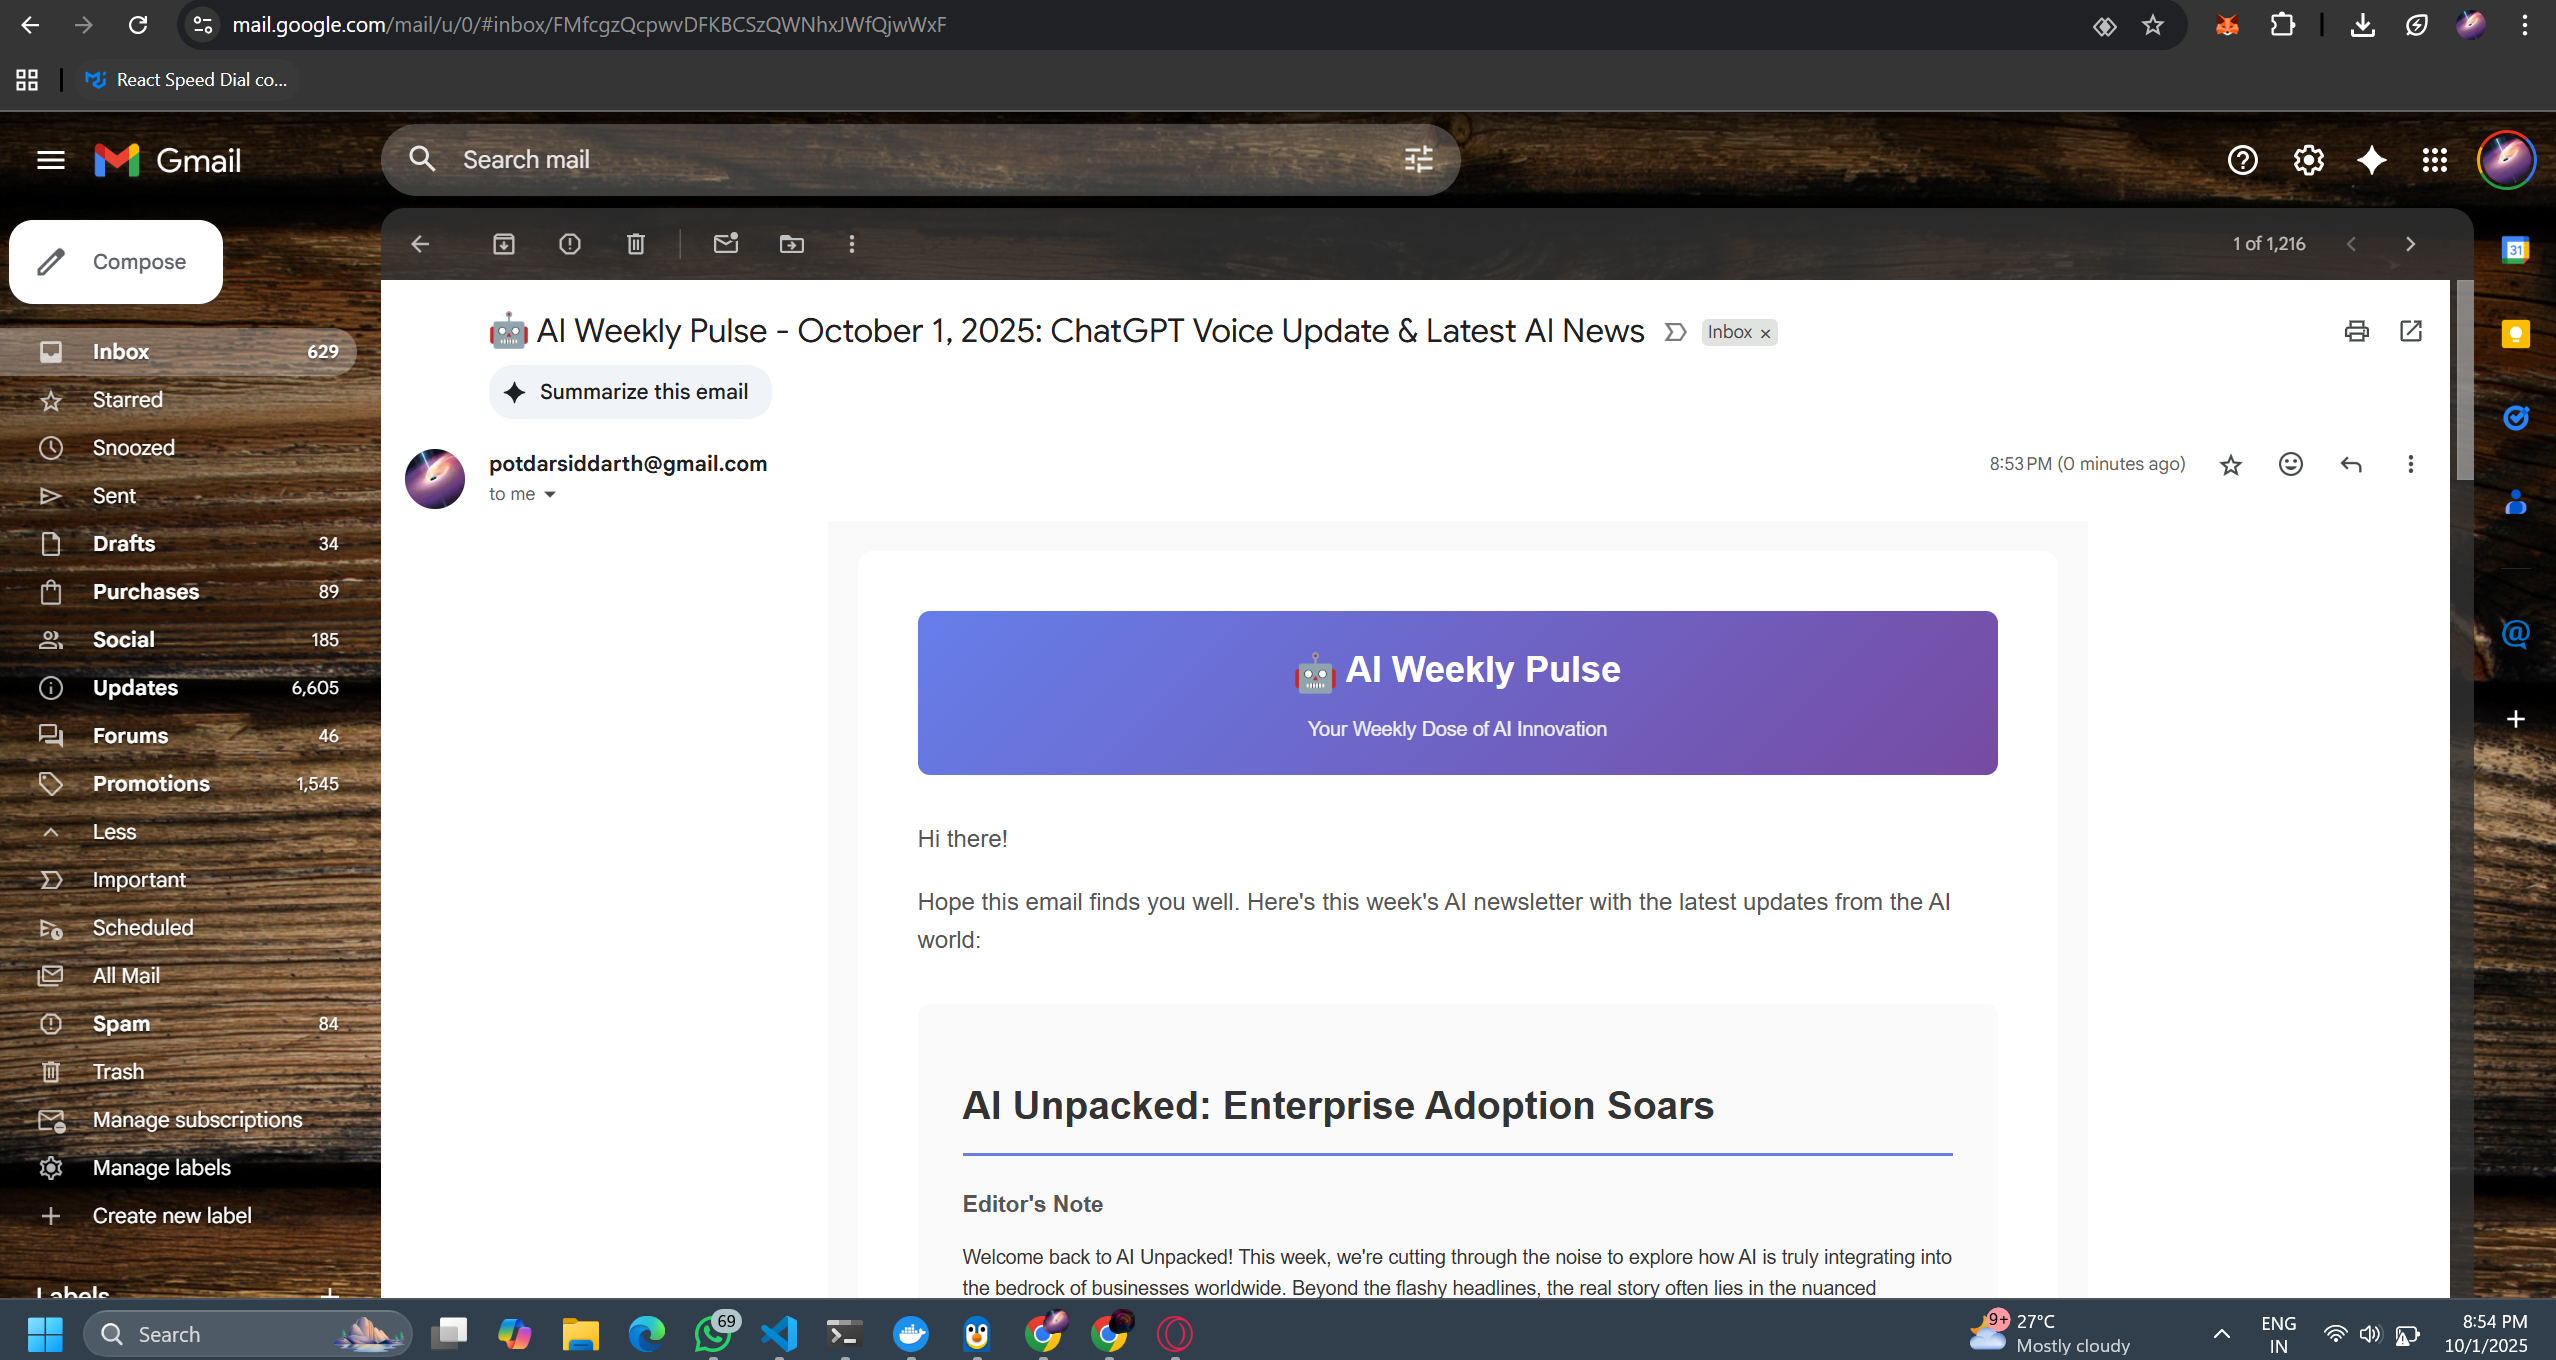

In [ ]:
{
  "name": "AI Newsletter Automation v0.1",
  "nodes": [
    {
      "parameters": {
        "assignments": {
          "assignments": [
            {
              "id": "current-date",
              "name": "currentDate",
              "type": "string",
              "value": "={{ $now.format('yyyy-MM-dd') }}"
            },
            {
              "id": "yesterday-date",
              "name": "lastweekDate",
              "type": "string",
              "value": "={{ $now.minus({days: 7}).format('yyyy-MM-dd') }}"
            }
          ]
        },
        "options": {}
      },
      "id": "0126f2c5-d6bf-4b81-b95f-44910b71e7ce",
      "name": "Set Dates1",
      "type": "n8n-nodes-base.set",
      "position": [
        -256,
        320
      ],
      "typeVersion": 3.4
    },
    {
      "parameters": {
        "sendTo": "abhi992005@gmail.com",
        "subject": "={{ $json.subject }}",
        "message": "={{ $json.html }}",
        "options": {}
      },
      "id": "294cb4a3-7c71-4c8f-b745-50a727803f13",
      "name": "Gmail1",
      "type": "n8n-nodes-base.gmail",
      "position": [
        576,
        320
      ],
      "webhookId": "6e5776e8-b6b9-4c56-8b3a-812f68959433",
      "typeVersion": 2.1,
      "credentials": {
        "gmailOAuth2": {
          "id": "6Ohhb7tLI8JRvtlf",
          "name": "Gmail account"
        }
      }
    },
    {
      "parameters": {
        "jsCode": "// n8n Code Node - Email Formatter for AI Newsletter\n// This code formats the AI agent output for email sending\n\n// Get the AI agent output from the previous node\nconst aiOutput = $input.all()[0].json.output || $input.all()[0].json.text || $input.all()[0].json;\n\n// Extract the newsletter content (remove the prefix text)\nlet newsletterContent = '';\nif (typeof aiOutput === 'object' && aiOutput.content) {\n  newsletterContent = aiOutput.content;\n} else if (typeof aiOutput === 'string') {\n  // Remove the \"this is the output from the ai agent:\" prefix if it exists\n  newsletterContent = aiOutput.replace(/^this is the output from the ai agent:\\s*/i, '');\n} else {\n  newsletterContent = JSON.stringify(aiOutput);\n}\n\n// Clean up the newsletter content - remove \\n literals and format properly\nnewsletterContent = newsletterContent\n  .replace(/\\\\n/g, '\\n')  // Convert literal \\n to actual newlines\n  .replace(/^\\s+|\\s+$/g, '')  // Trim whitespace\n  .replace(/\\n{3,}/g, '\\n\\n');  // Replace multiple newlines with double newlines\n\n// Generate email subject with current date\nfunction generateEmailSubject() {\n  const currentDate = new Date().toLocaleDateString('en-US', { \n    year: 'numeric', \n    month: 'long', \n    day: 'numeric' \n  });\n  return `🤖 AI Weekly Pulse - ${currentDate}: ChatGPT Voice Update & Latest AI News`;\n}\n\n// Generate email body with proper formatting\nfunction generateEmailBody() {\n  const emailBody = `Hi there!\n\nI hope this email finds you well. Here's this week's AI newsletter with the latest updates from the AI world:\n\n━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n\n${newsletterContent}\n\n━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n\nHope you found this week's AI updates valuable! Feel free to reply with your thoughts or questions.\n\nBest regards,\nAI Weekly Pulse Team\n\n---\n📧 This newsletter was automatically generated and sent via n8n automation.\n🔗 Want to unsubscribe or have questions? Just reply to this email.`;\n\n  return emailBody;\n}\n\n// Generate HTML version of the email for better formatting\nfunction generateHTMLEmailBody() {\n  // Convert markdown-like content to basic HTML\n  let htmlContent = newsletterContent\n    .replace(/^# (.*$)/gm, '<h1 style=\"color: #333; border-bottom: 2px solid #667eea; padding-bottom: 10px;\">$1</h1>')\n    .replace(/^## (.*$)/gm, '<h2 style=\"color: #444; margin-top: 30px; margin-bottom: 15px;\">$1</h2>')\n    .replace(/^### (.*$)/gm, '<h3 style=\"color: #555; margin-top: 20px; margin-bottom: 10px;\">$1</h3>')\n    .replace(/\\*\\*(.*?)\\*\\*/g, '<strong>$1</strong>')\n    .replace(/\\*(.*?)\\*/g, '<em>$1</em>')\n    .replace(/\\[([^\\]]+)\\]\\(([^)]+)\\)/g, '<a href=\"$2\" style=\"color: #667eea; text-decoration: none;\">$1</a>')\n    .replace(/^- (.*$)/gm, '<li style=\"margin-bottom: 8px;\">$1</li>')\n    .replace(/^> (.*$)/gm, '<blockquote style=\"border-left: 4px solid #667eea; padding-left: 20px; margin: 20px 0; font-style: italic; color: #666;\">$1</blockquote>')\n    .replace(/---/g, '<hr style=\"border: none; border-top: 2px solid #eee; margin: 30px 0;\">')\n    .replace(/\\n\\n/g, '</p><p style=\"line-height: 1.6; margin-bottom: 15px;\">')\n    .replace(/\\n/g, '<br>');\n\n  // Wrap list items in ul tags\n  htmlContent = htmlContent.replace(/(<li[^>]*>.*?<\\/li>)/gs, '<ul style=\"padding-left: 20px; margin-bottom: 20px;\">$1</ul>');\n\n  const htmlBody = `\n<!DOCTYPE html>\n<html>\n<head>\n    <meta charset=\"UTF-8\">\n    <meta name=\"viewport\" content=\"width=device-width, initial-scale=1.0\">\n    <title>AI Weekly Pulse</title>\n</head>\n<body style=\"font-family: Arial, sans-serif; line-height: 1.6; color: #333; max-width: 800px; margin: 0 auto; padding: 20px; background-color: #f9f9f9;\">\n    <div style=\"background: white; padding: 40px; border-radius: 10px; box-shadow: 0 4px 15px rgba(0,0,0,0.1);\">\n        <div style=\"text-align: center; margin-bottom: 30px; padding: 20px; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); border-radius: 8px; color: white;\">\n            <h1 style=\"margin: 0; font-size: 24px;\">🤖 AI Weekly Pulse</h1>\n            <p style=\"margin: 10px 0 0 0; opacity: 0.9;\">Your Weekly Dose of AI Innovation</p>\n        </div>\n        \n        <div style=\"margin-bottom: 30px;\">\n            <p style=\"font-size: 16px; color: #555;\">Hi there!</p>\n            <p style=\"font-size: 16px; color: #555;\">Hope this email finds you well. Here's this week's AI newsletter with the latest updates from the AI world:</p>\n        </div>\n        \n        <div style=\"background: #fafafa; padding: 30px; border-radius: 8px; margin: 20px 0;\">\n            <p style=\"line-height: 1.6; margin-bottom: 15px;\">${htmlContent}</p>\n        </div>\n        \n        <div style=\"margin-top: 40px; padding: 30px; background: #f0f4ff; border-radius: 8px; text-align: center;\">\n            <p style=\"font-size: 16px; color: #555; margin-bottom: 15px;\">Hope you found this week's AI updates valuable!</p>\n            <p style=\"font-size: 16px; color: #555; margin-bottom: 20px;\">Feel free to reply with your thoughts or questions.</p>\n            <p style=\"font-size: 18px; color: #333; margin: 0;\"><strong>Best regards,<br>AI Weekly Pulse Team</strong></p>\n        </div>\n        \n        <div style=\"margin-top: 30px; padding: 20px; background: #e8f2ff; border-radius: 8px; font-size: 14px; color: #666; text-align: center;\">\n            <p style=\"margin: 5px 0;\">📧 This newsletter was automatically generated and sent via n8n automation.</p>\n            <p style=\"margin: 5px 0;\">🔗 Want to unsubscribe or have questions? Just reply to this email.</p>\n        </div>\n    </div>\n</body>\n</html>`;\n\n  return htmlBody;\n}\n\n// Generate the formatted output for the email node\nconst emailSubject = generateEmailSubject();\nconst emailBodyText = generateEmailBody();\nconst emailBodyHTML = generateHTMLEmailBody();\n\n// Return the formatted data for the next node (email sender)\nreturn [\n  {\n    json: {\n      subject: emailSubject,\n      text: emailBodyText,\n      html: emailBodyHTML,\n      // Additional metadata\n      newsletter_content: newsletterContent,\n      generated_at: new Date().toISOString(),\n      email_type: \"ai_weekly_pulse\"\n    }\n  }\n];"
      },
      "id": "75d3c471-4163-47d0-b8da-ee6d7b5876ef",
      "name": "Format Email Content",
      "type": "n8n-nodes-base.code",
      "position": [
        352,
        320
      ],
      "typeVersion": 2
    },
    {
      "parameters": {
        "promptType": "define",
        "text": "=Newsletter Structure\n1. Title\nEngaging and punchy (under 10 words).\n\nIncludes a relevant keyword (e.g., “AI”, “ChatGPT”, “Machine Learning”).\n\n2. Editor’s Note (Optional but preferred)\nA short 2–3 sentence personal note to the readers.\n\nTone: Conversational and warm.\n\nSummarize the theme of this issue or highlight an AI trend to watch.\n\n3. 🧠 AI in Focus (Main Story)\nOne key development or trend in AI this week.\n\nCould be about a breakthrough, a major product launch, a regulatory move, or a case study.\n\n3–5 paragraphs long.\n\nInclude context (why it matters), impact, and your analysis.\n\n4. 📰 Headlines in AI (News Roundup)\nList 3–5 bite-sized headlines with 1–2 sentence summaries for each. Include:\n\nDate (optional).\n\nSource (e.g., OpenAI, Google, MIT, etc.).\n\nLink (if available).\n\nExample:\n\nOpenAI Releases GPT-5 Preview – OpenAI teased major upgrades in language understanding and reasoning. Read more\n\n5. 🔍 Tool of the Week\nIntroduce one new or underrated AI tool.\n\nInclude what it does, who it’s for, and how it works (2–3 sentences).\n\nInclude a link if available.\n\n6. 📚 Learning Corner\nRecommend one AI resource: a blog post, YouTube video, podcast, free course, or paper.\n\nMention why it’s worth reading/listening/watching.\n\n7. 🤖 Prompt of the Week\nShare a powerful or creative prompt users can try with ChatGPT or any LLM.\n\nExplain what it does and when to use it.\n\n8. 📈 AI Stat of the Week\nShare one interesting stat about AI.\n\nCite the source and explain the takeaway in 1–2 sentences.\n\n9. 👥 Community Shoutout (Optional)\nHighlight a person, open-source project, or discussion in the AI community.\n\n10. 👀 What to Watch Next Week\nPreview an upcoming event, release, or expected trend in AI.\n\nKeep it short (1–2 sentences).\n\n🧾 Style Guidelines\nUse markdown for formatting: **bold**, # headers, - lists, etc.\n\nKeep tone informative, clear, and slightly casual.\n\nAvoid jargon unless explained.\n\nUse bullet points and subheaders for readability.\n\nProvide citations for all the topics immediately ",
        "options": {
          "systemMessage": "You are an AI writing assistant tasked with creating a weekly newsletter about artificial intelligence (AI). The goal is to inform, engage, and educate readers ranging from tech-savvy professionals to curious enthusiasts. Follow the structure below and ensure the tone is professional yet accessible."
        }
      },
      "id": "b2b61d23-3a6f-42a7-883a-d3b3493d25f9",
      "name": "AI Agent",
      "type": "@n8n/n8n-nodes-langchain.agent",
      "position": [
        -32,
        320
      ],
      "typeVersion": 1.9
    },
    {
      "parameters": {
        "rule": {
          "interval": [
            {}
          ]
        }
      },
      "id": "c67884aa-6c34-4152-9844-3ec81ad38608",
      "name": "Schedule Trigger",
      "type": "n8n-nodes-base.scheduleTrigger",
      "position": [
        -448,
        320
      ],
      "typeVersion": 1.2
    },
    {
      "parameters": {
        "options": {}
      },
      "type": "@n8n/n8n-nodes-langchain.lmChatGoogleGemini",
      "typeVersion": 1,
      "position": [
        -160,
        528
      ],
      "id": "73fc791e-4a21-4164-93a5-1ee3d0d28f40",
      "name": "Google Gemini Chat Model",
      "credentials": {
        "googlePalmApi": {
          "id": "e3myEuUsnEuaxwXa",
          "name": "DAY 21 project gemini credentials"
        }
      }
    }
  ],
  "pinData": {},
  "connections": {
    "AI Agent": {
      "main": [
        [
          {
            "node": "Format Email Content",
            "type": "main",
            "index": 0
          }
        ]
      ]
    },
    "Set Dates1": {
      "main": [
        [
          {
            "node": "AI Agent",
            "type": "main",
            "index": 0
          }
        ]
      ]
    },
    "Schedule Trigger": {
      "main": [
        [
          {
            "node": "Set Dates1",
            "type": "main",
            "index": 0
          }
        ]
      ]
    },
    "Format Email Content": {
      "main": [
        [
          {
            "node": "Gmail1",
            "type": "main",
            "index": 0
          }
        ]
      ]
    },
    "Google Gemini Chat Model": {
      "ai_languageModel": [
        [
          {
            "node": "AI Agent",
            "type": "ai_languageModel",
            "index": 0
          }
        ]
      ]
    }
  },
  "active": false,
  "settings": {
    "executionOrder": "v1"
  },
  "versionId": "3a6b385e-6640-4154-ac58-bfbb8a6470fe",
  "meta": {
    "instanceId": "e79b739b18a06343b9dfa2efb1e54b0608e1c04e78419cb45dc917349a00144a"
  },
  "id": "UUqkqjzTCxTCPu6l",
  "tags": []
}